In [1]:
from networkx.algorithms import bipartite
from collections import defaultdict
import os
import pickle
import networkx as nx
import pandas as pd

C:\Users\ersin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ersin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\ersin\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# FILING DELAYS TAKE A LOOK

In [206]:
import pandas as pd

edges = pd.read_csv("edges.csv", index_col=0)
stocks = pd.read_csv("stocks.csv", index_col=0)
investors = pd.read_csv("investors.csv", index_col=0)

df_delays = edges.merge(stocks, how='left', on ='name')


In [207]:
edges.shape, stocks.shape, df_delays.shape

((24034481, 8), (11679, 6), (24596386, 13))

In [70]:
df_delays = df_delays.drop_duplicates(subset=["cikname","name","quarter","changeCat"], keep='first')


In [208]:
df_delays = df_delays.merge(investors, how='left', on ='cikname')

In [210]:
df_delays = df_delays.drop_duplicates(subset=["cikname","name","quarter","changeCat"], keep='first')

df_delays.shape

(24033284, 14)

In [212]:
df_delays = df_delays[["cikname","name","quarter","changeCat","delay_cat","sicSector","sicIndustry","investor_rank"]]

df_delays.head()

,cikname,name,quarter,changeCat,delay_cat,sicSector,sicIndustry,investor_rank
0,FRED ALGER MANAGEMENT INC,AAC HOLDINGS INC,2015-06-30,Buy,on time,Services,Services-Specialty Outpatient Facilities Nec,large_investor
1,FRED ALGER MANAGEMENT INC,AAR CORP,2011-12-31,Large Sale,on time,Manufacturing,Aircraft & Parts,large_investor
2,FRED ALGER MANAGEMENT INC,AAR CORP,2012-03-31,Significant Sale,on time,Manufacturing,Aircraft & Parts,large_investor
3,FRED ALGER MANAGEMENT INC,ADT CORP,2012-12-31,Significant Buy,on time,Services,Services-Detective Guard & Armored Car Services,large_investor
4,FRED ALGER MANAGEMENT INC,ADT CORP,2013-03-31,Large Buy,on time,Services,Services-Detective Guard & Armored Car Services,large_investor


<AxesSubplot:>

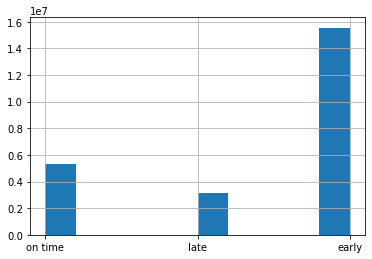

In [117]:
df_delays.delay_cat.hist()

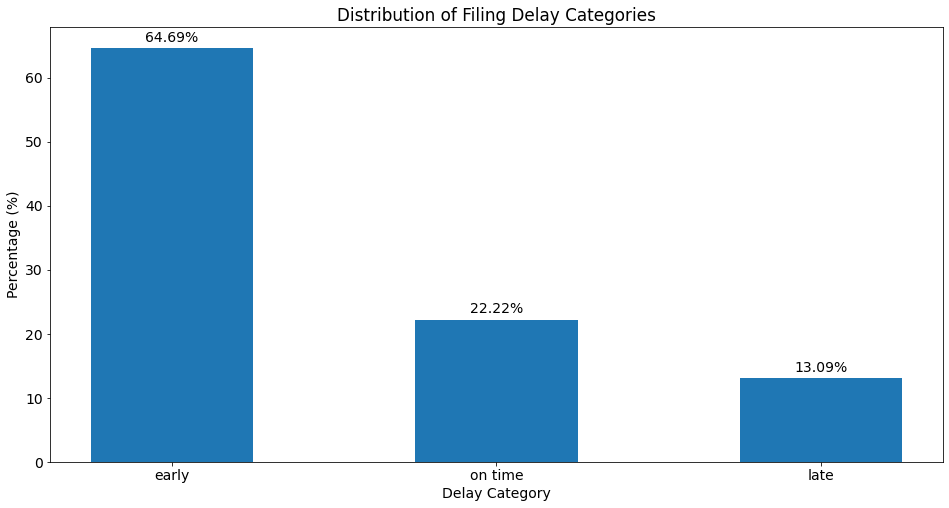

In [202]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.rcParams.update({'font.size': 14}) 

# Count the frequency of each investor rank
rank_counts = df_delays['delay_cat'].value_counts(normalize=True) * 100  # Get percentages

# Plotting the histogram
plt.bar(rank_counts.index, rank_counts.values, width=0.5)

# Adding labels and title
plt.xlabel('Delay Category')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Filing Delay Categories')

# Adding percentages on top of each bar
for index, value in enumerate(rank_counts.values):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')

# Show the plot
plt.show()


In [ ]:
### GROUP BY SICSECTOR SICINDUSTRY AND COUNT DELAY_CATS

In [77]:
oil_lst = ["Crude Petroleum & Natural Gas",
                            "Drilling Oil & Gas Wells",
                            "Oil & Gas Field Exploration Services",
                            "Oil & Gas Field Services, NEC"]

software_lst = ["Services-Computer Programming Services",
                                "Services-Prepackaged Software",
                                "Services-Computer Integrated Systems Design",
                                "Services-Computer Processing & Data Preparation",
                                "Services-Computer Programming, Data Processing, Etc."]

finance_industry = ["Mortgage Bankers & Loan Correspondents",
                                    "Real Estate", 
                                    "Real Estate Operators (No Developers) & Lessors", 
                                    "Operators of Nonresidential Buildings",
                                    "Operators of Apartment Buildings",
                                    "Lessors of Real Property, NEC",
                                    "Real Estate Agents & Managers (For Others)",
                                    "Real Estate Dealers (For Their Own Account)",
                                    "Land Subdividers & Developers (No Cemeteries)" ,
                                    "Real Estate Investment Trusts"]

df_software = df_delays[df_delays['sicIndustry'].isin(software_lst)]
df_oil = df_delays[df_delays['sicIndustry'].isin(oil_lst)]
df_finance = df_delays[df_delays['sicIndustry'].isin(finance_industry)]


In [119]:
# Function to calculate delay_cat_counts and add prefix
def calculate_and_prefix(df, prefix):
    delay_cat_counts = df.groupby('quarter')['delay_cat'].value_counts().unstack(fill_value=0)
    delay_cat_counts = delay_cat_counts.add_prefix(prefix + "_")
    return delay_cat_counts

names = ["software", "oil","real_estate","general"]

# Calculate for each DataFrame and store in a list
all_delay_cat_counts = [calculate_and_prefix(df, name) for df, name in zip([df_software, df_oil, df_finance, df_delays], names)]

# Combine all DataFrames
combined_df = pd.concat(all_delay_cat_counts, axis=1)

# If you want to sum up the values of same quarters across all DataFrames
final_df = combined_df.groupby(level=0, axis=1).sum()


C:\Users\ersin\AppData\Local\Temp\ipykernel_10248\3961222138.py:16: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  final_df = combined_df.groupby(level=0, axis=1).sum()


In [120]:
final_df

delay_cat,general_early,general_late,general_on time,oil_early,oil_late,oil_on time,real_estate_early,real_estate_late,real_estate_on time,software_early,software_late,software_on time
quarter,,,,,,,,,,,,
1999-06-30,151533,58287,0,2863,1148,0,3964,1954,0,10286,3908,0
1999-09-30,136411,56092,0,2989,1221,0,3286,1691,0,9824,4225,0
1999-12-31,113811,33517,50503,2262,620,1035,2560,719,1232,9496,2965,4418
2000-03-31,146442,18836,51190,2887,391,1125,2886,468,1284,12907,1594,4875
2000-06-30,139147,50098,36147,3113,1116,865,4229,1539,1190,10914,4105,2989
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-30,217684,29735,168487,7147,1119,6171,14380,2036,10103,11272,1472,9944
2016-12-31,273997,26302,154657,9176,945,5988,17673,1639,9559,13652,1292,8390
2017-03-31,287400,11365,144310,9396,359,5688,18390,720,8840,14081,608,7928


In [132]:
final_df.head()

delay_cat,general_early,general_late,general_on time,oil_early,oil_late,oil_on time,real_estate_early,real_estate_late,real_estate_on time,software_early,software_late,software_on time
quarter,,,,,,,,,,,,
1999-06-30,151533,58287,0,2863,1148,0,3964,1954,0,10286,3908,0
1999-09-30,136411,56092,0,2989,1221,0,3286,1691,0,9824,4225,0
1999-12-31,113811,33517,50503,2262,620,1035,2560,719,1232,9496,2965,4418
2000-03-31,146442,18836,51190,2887,391,1125,2886,468,1284,12907,1594,4875
2000-06-30,139147,50098,36147,3113,1116,865,4229,1539,1190,10914,4105,2989


In [147]:
def plot_dataframe(df_clustering, title): 

    # Convert the index to datetime
    df_clustering.index = pd.to_datetime(df_clustering.index)

    dot_com_start = '2000-06-30'
    dot_com_end = '2002-12-31'

    financial_start = '2007-12-31'
    financial_end = '2009-12-31'

    oil_start = '2014-06-30'
    oil_end = '2016-03-31'

    # Plotting
    ax = df_clustering.plot(kind="line", figsize=(20, 6), style=["-*", "-", "-", "-", "--", "--", "--"], legend=True)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Value")

    # Set x-axis labels to each date in the DataFrame's index, skipping one by one
    xticks_labels = df_clustering.index[::2]  # Change the number '2' to skip more/less
    plt.xticks(ticks=xticks_labels, labels=[label.strftime('%Y-%m-%d') for label in xticks_labels], rotation=45)

    # Apply colored spans
    ax.axvspan(pd.to_datetime(dot_com_start), pd.to_datetime(dot_com_end), color='yellow', alpha=0.3, label='Dot-com Bubble')
    ax.axvspan(pd.to_datetime(financial_start), pd.to_datetime(financial_end), color='orange', alpha=0.3, label='2008 Financial Crisis')
    ax.axvspan(pd.to_datetime(oil_start), pd.to_datetime(oil_end), color='red', alpha=0.3, label='Oil Price Shock')

    plt.grid(True)
    plt.show()


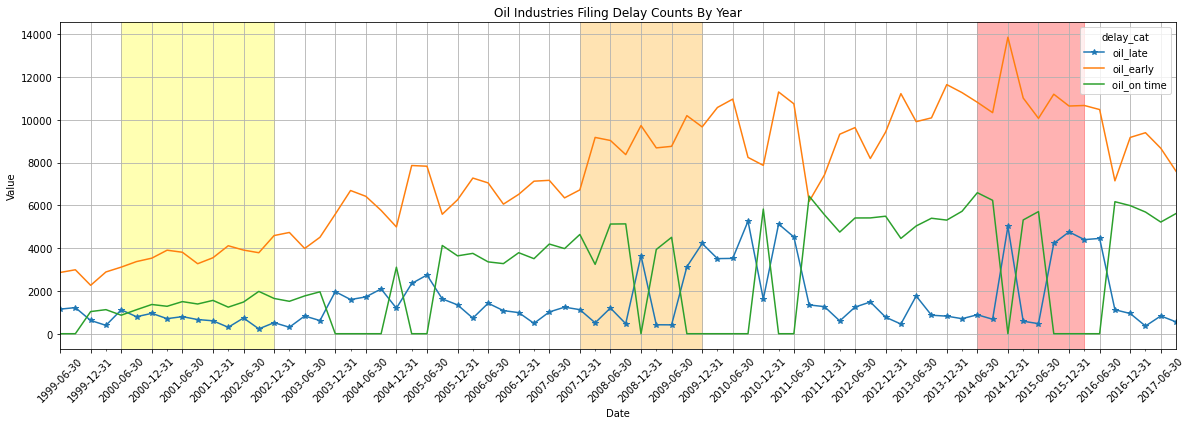

In [148]:
#df = final_df[["software_late","software_early","software_on time"]]
df = final_df[["oil_late","oil_early","oil_on time"]]
#df = final_df[["real_estate_late","real_estate_early","real_estate_on time"]]

#df = final_df[["real_estate_late","oil_late","software_late"]]
plot_dataframe(df, "Oil Industries Filing Delay Counts By Year")

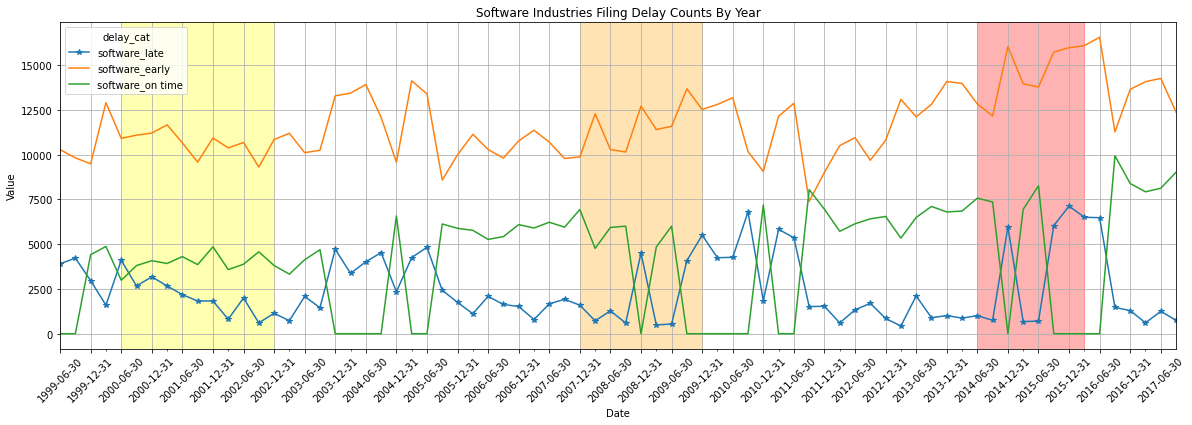

In [149]:
df = final_df[["software_late","software_early","software_on time"]]
plot_dataframe(df, "Software Industries Filing Delay Counts By Year")

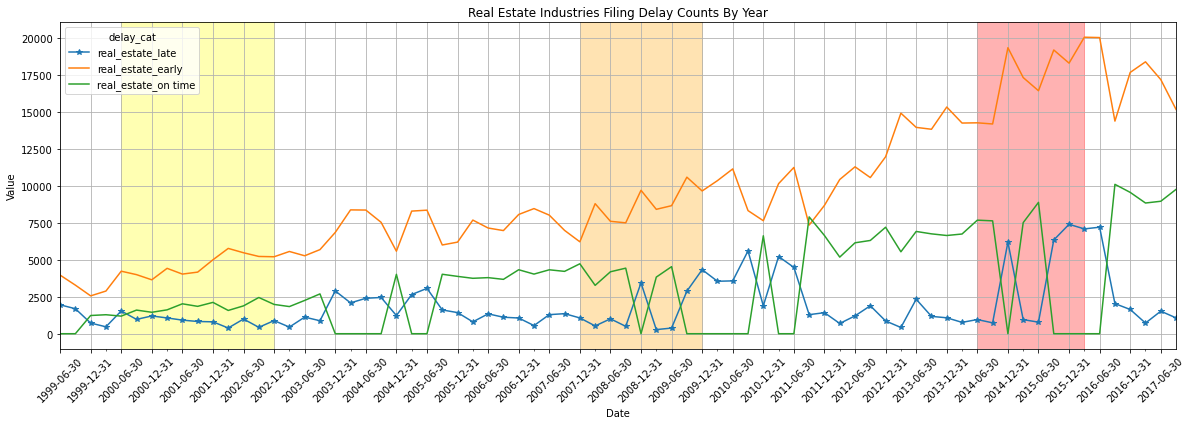

In [150]:
df = final_df[["real_estate_late","real_estate_early","real_estate_on time"]]
plot_dataframe(df, "Real Estate Industries Filing Delay Counts By Year")

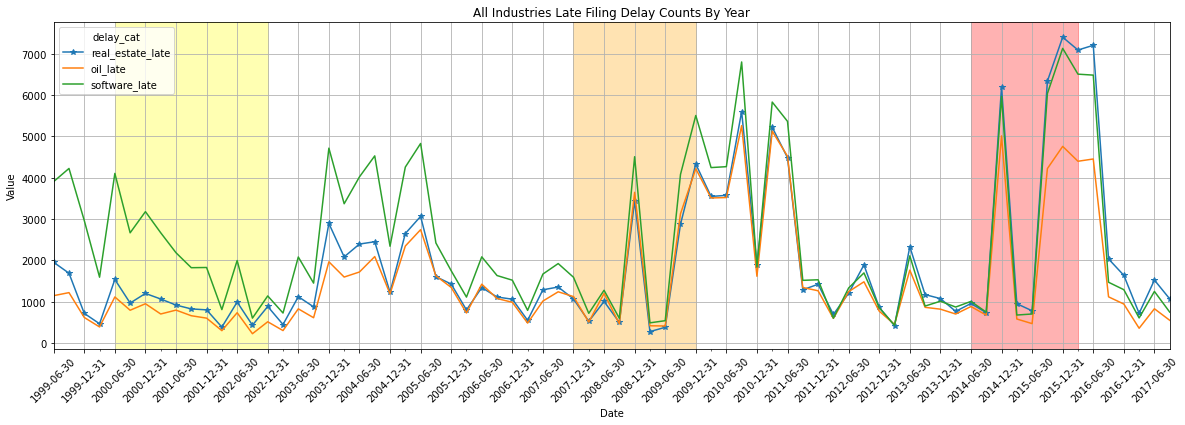

In [151]:
df = final_df[["real_estate_late","oil_late","software_late"]]
plot_dataframe(df, "All Industries Late Filing Delay Counts By Year")

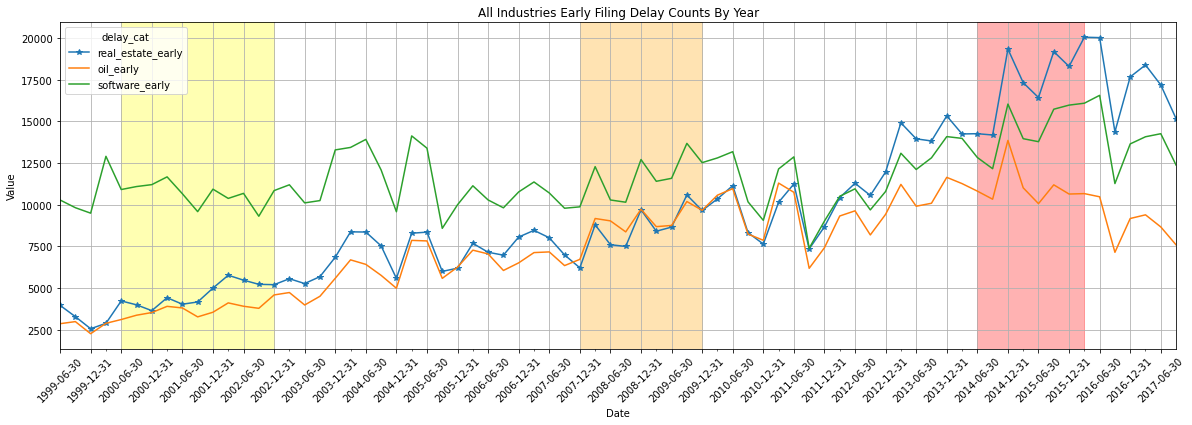

In [153]:
df = final_df[["real_estate_early","oil_early","software_early"]]
plot_dataframe(df, "All Industries Early Filing Delay Counts By Year")

In [179]:
df_delays.shape

(24033284, 7)

In [186]:
df_delays.head()

,cikname,name,quarter,changeCat,delay_cat,sicSector,sicIndustry,group
0,FRED ALGER MANAGEMENT INC,AAC HOLDINGS INC,2015-06-30,Buy,on time,Services,Services-Specialty Outpatient Facilities Nec,6
1,FRED ALGER MANAGEMENT INC,AAR CORP,2011-12-31,Large Sale,on time,Manufacturing,Aircraft & Parts,1
2,FRED ALGER MANAGEMENT INC,AAR CORP,2012-03-31,Significant Sale,on time,Manufacturing,Aircraft & Parts,4
3,FRED ALGER MANAGEMENT INC,ADT CORP,2012-12-31,Significant Buy,on time,Services,Services-Detective Guard & Armored Car Services,4
4,FRED ALGER MANAGEMENT INC,ADT CORP,2013-03-31,Large Buy,on time,Services,Services-Detective Guard & Armored Car Services,8


In [228]:
import pandas as pd
import numpy as np

# Assuming df_delays is your DataFrame

# List of investor ranks
investor_ranks = ['large_investor', 'medium_investor', 'small_investor']

# Initialize an empty DataFrame for the final result
final_df = pd.DataFrame()

# Process each investor rank
for rank in investor_ranks:
    # Filter the DataFrame for the current investor rank
    df_rank = df_delays[df_delays['investor_rank'] == rank]

    # Group by 'quarter' and 'delay_cat', and count occurrences
    grouped = df_rank.groupby(['quarter', 'delay_cat']).size().reset_index(name='count')

    # Pivot the table
    pivot = grouped.pivot(index='quarter', columns='delay_cat', values='count').fillna(0)

    # Rename the columns to include the investor rank
    pivot.columns = [f'{col}_count_{rank}' for col in pivot.columns]

    # Concatenate with the final DataFrame
    final_df = pd.concat([final_df, pivot], axis=1)

# Reset the index to include 'quarter' as a column
final_df.reset_index(inplace=True)

# Display the result
final_df.head()




,quarter,early_count_large_investor,late_count_large_investor,on time_count_large_investor,early_count_medium_investor,late_count_medium_investor,on time_count_medium_investor,early_count_small_investor,late_count_small_investor,on time_count_small_investor
0,1999-06-30,63518.0,24129.0,0.0,74726.0,30236.0,0.0,13289.0,3922.0,0.0
1,1999-09-30,60145.0,22855.0,0.0,67975.0,29481.0,0.0,8291.0,3756.0,0.0
2,1999-12-31,50931.0,14362.0,26233.0,55240.0,15721.0,22179.0,7640.0,3434.0,2091.0
3,2000-03-31,63713.0,7954.0,27475.0,73714.0,9475.0,21695.0,9015.0,1407.0,2020.0
4,2000-06-30,66150.0,26804.0,13327.0,65599.0,21012.0,21009.0,7398.0,2282.0,1811.0


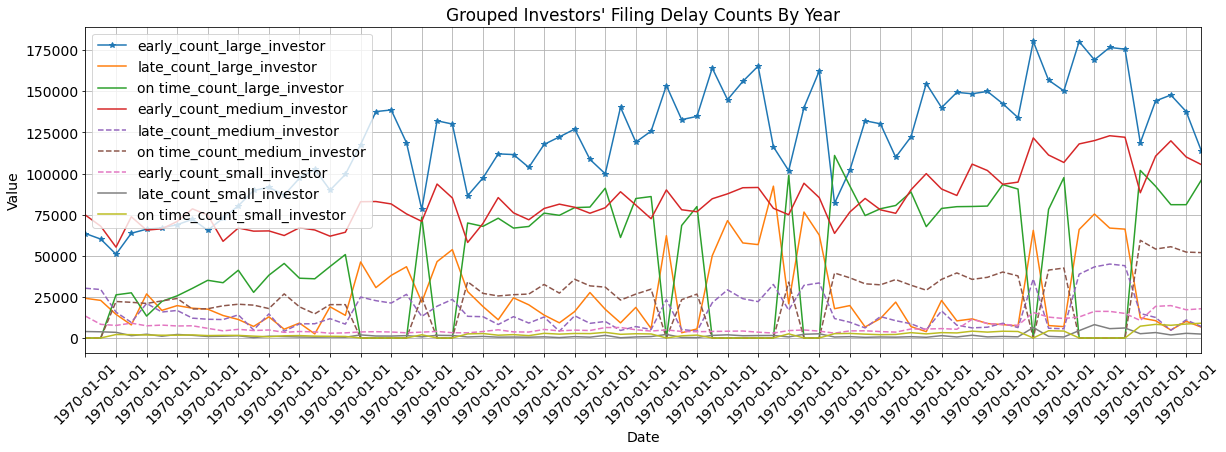

In [232]:
# create_dataframe_with_substring
# df = create_dataframe_with_substring(final_df, "on time")
plot_dataframe(final_df, "Grouped Investors' Filing Delay Counts By Year")

# SETUP DATAFRAME

In [161]:
m1 = pd.read_csv("final_results_1.csv", index_col=0)
m2 = pd.read_csv("final_results_2.csv", index_col=0)
m3 = pd.read_csv("final_results_3.csv", index_col=0)
m4 = pd.read_csv("final_results_4.csv", index_col=0)

In [162]:
df = m1.merge(m2, how='left', on ='date')

df = df.merge(m3, how='left', on ='date')

df = df.merge(m4, how='left', on ='date')

In [164]:
# Drop columns containing the substring
def drop_cols(df, substring):
    return df.loc[:, ~df.columns.str.contains(substring)]

substring = "weakly_connected_components"
df = drop_cols(df.copy(), substring)

In [165]:
df.shape

(74, 78)

In [166]:
df = df.set_index('date')

In [167]:
df.head()

,total_graph_density,total_graph_avg_degree,total_graph_clustering,total_graph_late_filing_percentage,total_graph_significant_change_percentage,finance_sector_density,finance_sector_avg_degree,finance_sector_clustering,finance_sector_late_filing_percentage,finance_sector_significant_change_percentage,...,oil_sector_early_filing_percentage,oil_sector_on_filing_percentage,services_sector_early_filing_percentage,services_sector_on_filing_percentage,software_industry_early_filing_percentage,software_industry_on_filing_percentage,oil_industry_early_filing_percentage,oil_industry_on_filing_percentage,real_estate_industry_early_filing_percentage,real_estate_industry_on_filing_percentage
date,,,,,,,,,,,,,,,,,,,,,
1999-06-30,0.000974,19.387012,0.014158,0.279530,0.088784,0.010525,23.427060,0.025854,0.300512,0.084130,...,0.725605,0.000000,0.719177,0.000000,0.723332,0.000000,0.713644,0.000000,0.669802,0.000000
1999-09-30,0.000900,17.900193,0.012776,0.292255,0.073596,0.009528,21.158870,0.025992,0.307554,0.073833,...,0.708876,0.000000,0.701838,0.000000,0.698824,0.000000,0.709769,0.000000,0.659676,0.000000
1999-12-31,0.000927,18.438498,0.014172,0.168859,0.081286,0.008674,19.762208,0.026406,0.156124,0.080404,...,0.563065,0.264103,0.559049,0.268481,0.561808,0.262217,0.577414,0.264180,0.567214,0.273292
2000-03-31,0.001008,20.054701,0.012295,0.086637,0.079791,0.008830,20.017880,0.022940,0.086853,0.074093,...,0.665686,0.247361,0.665243,0.252136,0.665497,0.252762,0.655838,0.255566,0.622356,0.276867
2000-06-30,0.001050,20.891933,0.013257,0.223397,0.075963,0.009868,22.784526,0.021027,0.216197,0.080367,...,0.620603,0.157376,0.601936,0.164131,0.605349,0.166290,0.611111,0.169808,0.607657,0.171128


# DATAFRAME VIEW FUNCTIONS

In [219]:
def create_dataframe_with_substring(df, substring):

    filtered_columns = [col for col in df.columns if substring in col]
    
    return df[filtered_columns]

# DF VIEWS

In [169]:
####

## Buy/Sale by indusrty güzel. öncesinde başlayan daralmayı gösteriyor.

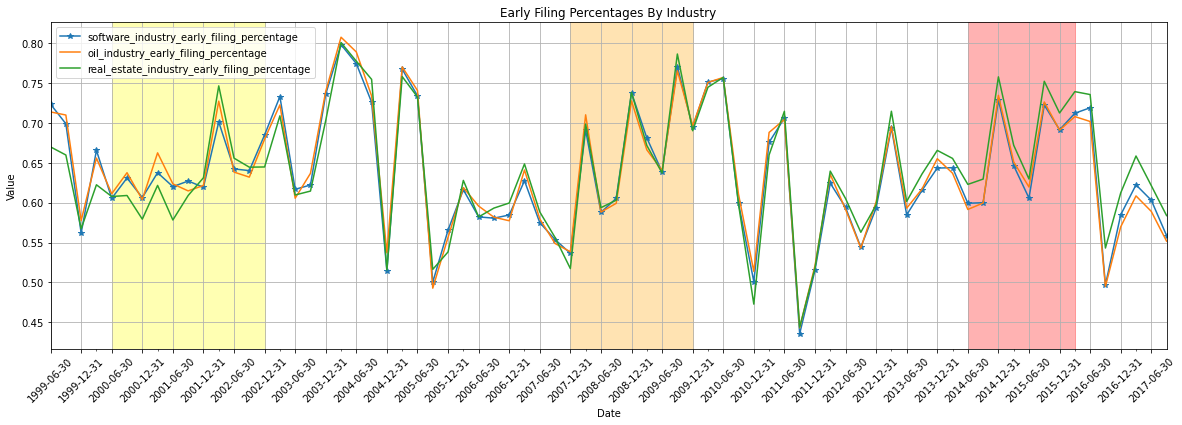

In [174]:
df_clustering = create_dataframe_with_substring(df, "early_filing")
df_clustering = create_dataframe_with_substring(df_clustering, "industry")
#df_clustering = drop_cols(df_clustering.copy(), "filing")

plot_dataframe(df_clustering, "Early Filing Percentages By Industry")


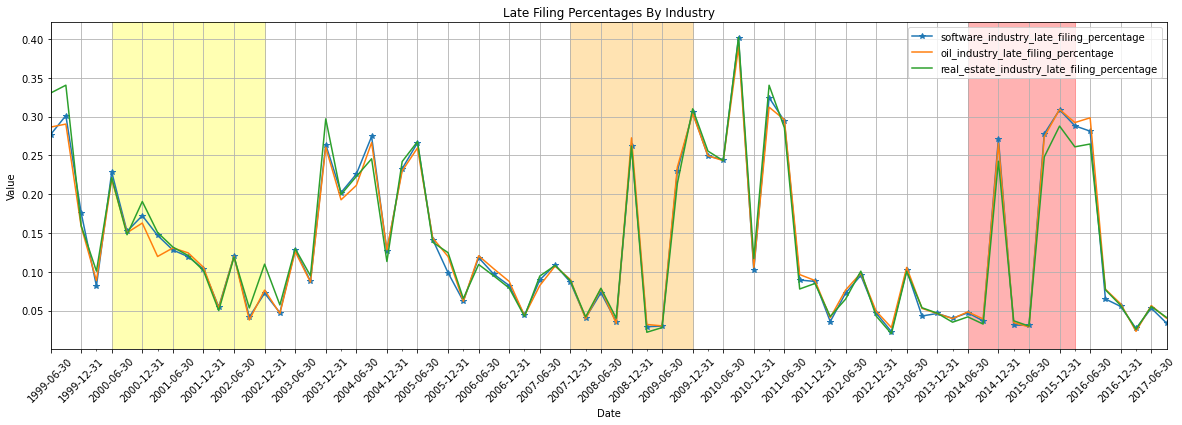

In [178]:
df_clustering = create_dataframe_with_substring(df, "late_filing")
df_clustering = create_dataframe_with_substring(df_clustering, "industry")
#df_clustering = drop_cols(df_clustering.copy(), "filing")

plot_dataframe(df_clustering, "Late Filing Percentages By Industry")

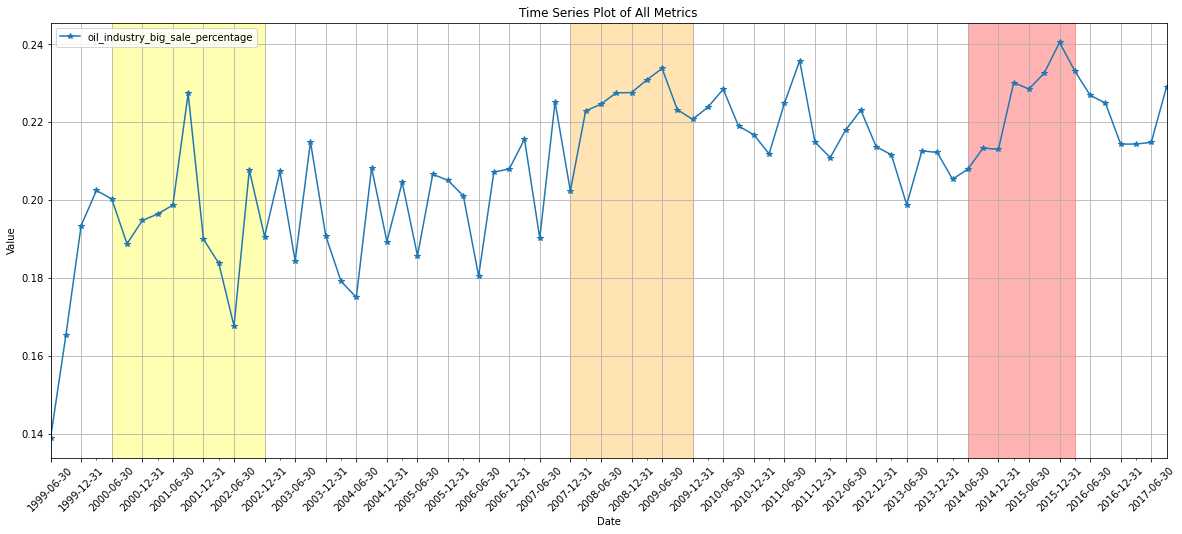

In [48]:
df_clustering = create_dataframe_with_substring(df, "_big_sale")
df_clustering = create_dataframe_with_substring(df_clustering, "oil_industry")
# df_clustering = drop_cols(df_clustering.copy(), "filing")
plot_dataframe(df_clustering)

In [195]:
df_clustering = create_dataframe_with_substring(df, "components")
df_clustering = drop_cols(df_clustering.copy(), "total")
# df_clustering = create_dataframe_with_substring(df_clustering, "industry")

In [196]:
df_clustering.head()

,finance_sector_number_strongly_connected_components,oil_sector_number_strongly_connected_components,services_sector_number_strongly_connected_components,software_industry_number_strongly_connected_components,oil_industry_number_strongly_connected_components,real_estate_industry_number_strongly_connected_components
date,,,,,,
1999-06-30,882,688,908,824,538,515
1999-09-30,734,573,730,719,496,459
1999-12-31,806,678,809,730,453,486
2000-03-31,698,545,710,701,472,432
2000-06-30,754,637,684,689,488,542


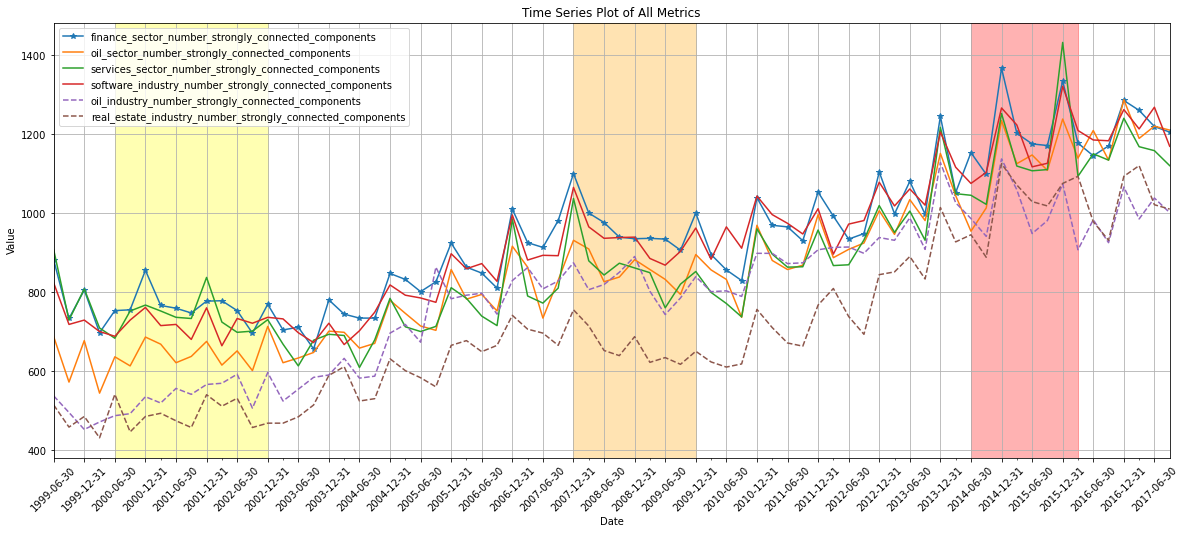

In [197]:
plot_dataframe(df_clustering)

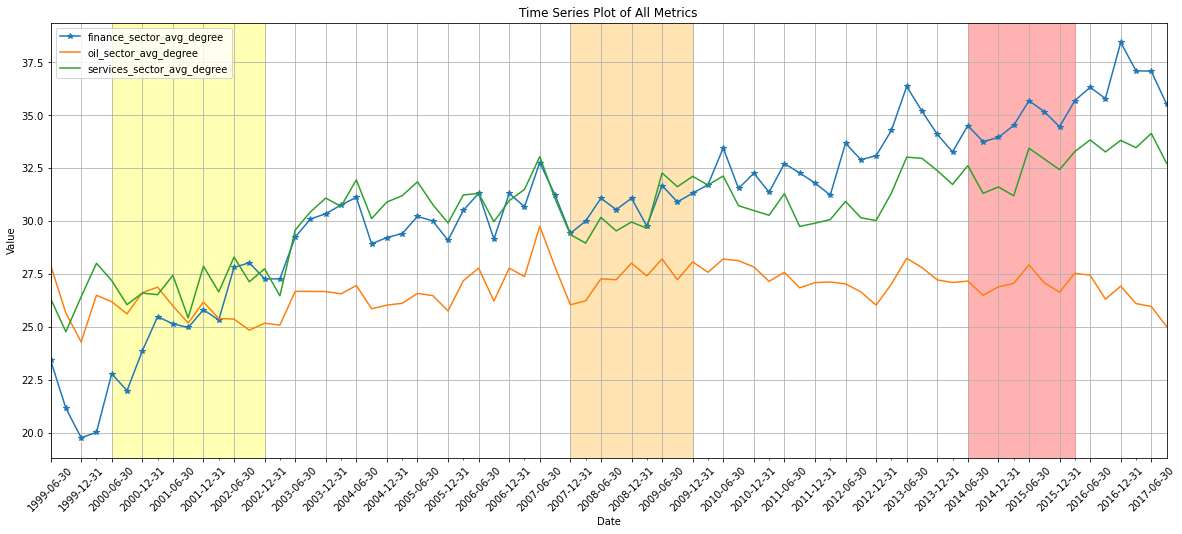

In [250]:
df_clustering = create_dataframe_with_substring(df, "degree")
df_clustering = drop_cols(df_clustering.copy(), "total")
df_clustering = create_dataframe_with_substring(df_clustering, "sector")

plot_dataframe(df_clustering)

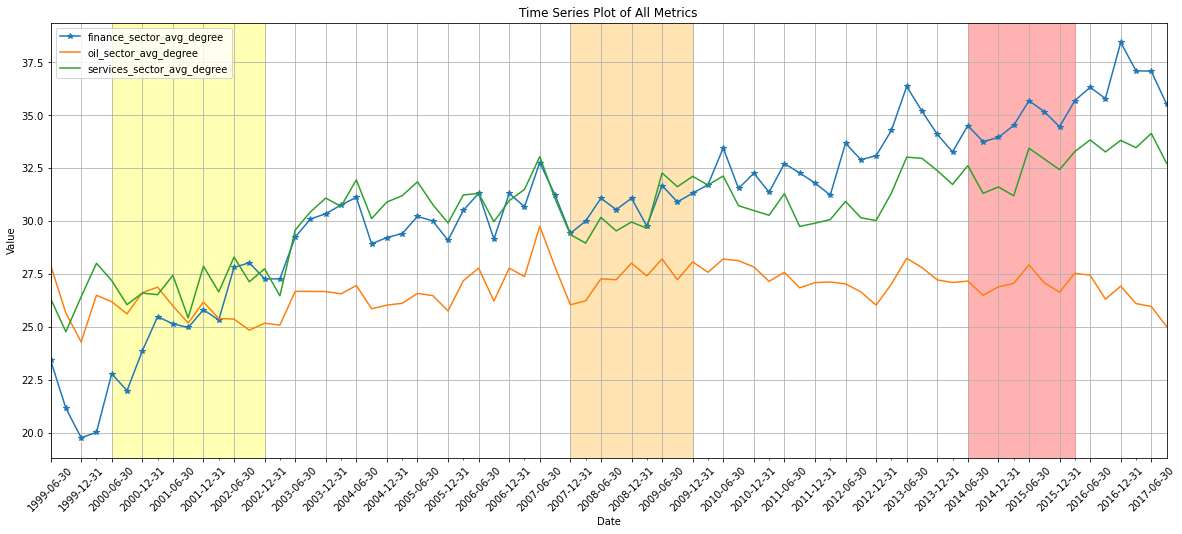

In [119]:


    
plot_dataframe(df_clustering)

In [137]:
signal = df.get(["total_graph_clustering"])

C:\Users\ersin\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


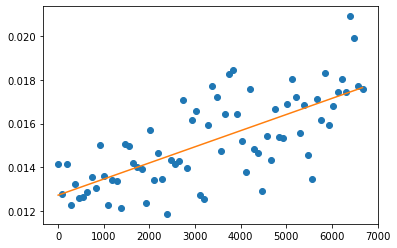

In [141]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Assuming 'df' is your DataFrame and it has a column 'total_graph_clustering'
signal = df['total_graph_clustering']

# Convert index to datetime and then to days since start
x = pd.to_datetime(signal.index)
start_date = x.min()  # or you can set a specific start date
x = (x - start_date).days

# Convert x to a numpy array
x = x.to_numpy()

y = signal.values.ravel()  # Flatten the array if necessary

def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x: k1*x + y0 - k1*x0, lambda x: k2*x + y0 - k2*x0])

# Curve fitting
p, e = optimize.curve_fit(piecewise_linear, x, y)

# For plotting, create a range of x values
xd = np.linspace(x.min(), x.max(), 100)

plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p))
plt.show()



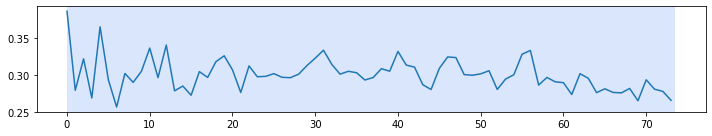

In [136]:
import matplotlib.pyplot as plt
import ruptures as rpt

bkps = 4  # number of breakpoints


signal = df.get(["real_estate_industry_big_buy_percentage"])

# detection
algo = rpt.Pelt(model="rbf").fit(signal)
result = algo.predict(pen=10)

# display
rpt.display(signal, result)
plt.show()

In [19]:
!pip install ruptures

     -------------------------------------- 384.2/384.2 kB 1.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
